<a href="https://colab.research.google.com/github/FerielOuaichouche/Face_Mask_Detection/blob/main/Face_Mask_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp '/content/drive/My Drive/Colab Notebooks/dataset.zip' .

In [ ]:
from zipfile import ZipFile
dataset_zip = '/content/dataset.zip'



In [ ]:
with ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset/')

    print('The dataset is extracted')


The dataset is extracted


In [ ]:
!ls

dataset  dataset.zip  drive  image_à_prédire.jpg  sample_data


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/dataset/data/with_mask')
without_mask_files = os.listdir('/content/dataset/data/without_mask')

In [ ]:
print('Number of with Mask images ', len(with_mask_files))
print('Number of without Mask images ', len(without_mask_files))

Number of with Mask images  3725
Number of without Mask images  3828


In [ ]:
#Creatinh labels for the two class of images
#With Mask --> 1
#without Mask --> 0

with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [ ]:
print (with_mask_labels[0:5])
print (without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
labels = with_mask_labels + without_mask_labels
print (labels[0:5])
print (labels[-5:])
print(len(labels))

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]
7553


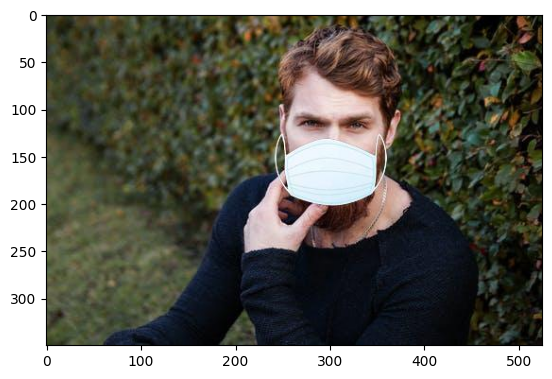

In [ ]:
#Displayin with mask images
img = mpimg.imread('/content/dataset/data/with_mask/with_mask_1.jpg')
# Afficher l'image
plt.imshow(img)
#plt.axis('off')  # Ne pas afficher les axes
plt.show()

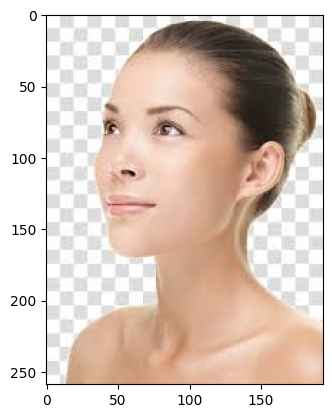

In [ ]:
#Displayin without mask images
img = mpimg.imread('/content/dataset/data/without_mask/without_mask_2925.jpg')
# Afficher l'image
plt.imshow(img)
#plt.axis('off')  # Ne pas afficher les axes
plt.show()

In [ ]:
#Image Processing
#--> Resize Images
#--> Convert images to a numpy arrays

with_mask_path = '/content/dataset/data/with_mask/'
data=[]

for img_file in with_mask_files :
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/dataset/data/without_mask/'

for img_file in without_mask_files :
  image =  Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
len(data)

7553

In [ ]:
type(data)

list

array([[[39, 32, 26],
        [41, 34, 28],
        [48, 42, 38],
        ...,
        [40, 30, 29],
        [38, 28, 27],
        [37, 27, 26]],

       [[41, 34, 28],
        [42, 35, 29],
        [49, 43, 39],
        ...,
        [41, 31, 30],
        [39, 29, 28],
        [37, 27, 26]],

       [[39, 33, 27],
        [41, 36, 30],
        [47, 43, 39],
        ...,
        [46, 36, 35],
        [42, 32, 31],
        [40, 30, 29]],

       ...,

       [[58, 53, 50],
        [56, 51, 48],
        [52, 47, 44],
        ...,
        [19, 19, 19],
        [16, 16, 16],
        [16, 14, 15]],

       [[58, 53, 50],
        [57, 52, 49],
        [53, 48, 45],
        ...,
        [19, 19, 19],
        [17, 16, 17],
        [16, 14, 15]],

       [[56, 51, 48],
        [55, 50, 47],
        [51, 46, 43],
        ...,
        [21, 21, 22],
        [18, 17, 19],
        [16, 14, 16]]], dtype=uint8)
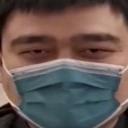

In [ ]:
data[0]


In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
#Converting image list & label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

print(X.shape , X_train.shape , X_test.shape )

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
#Scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255


In [ ]:
#Building the CNN

import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_class = 2
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3) , activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3) , activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_class, activation='sigmoid'))


In [ ]:
#complile the NN

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
#Training the NN

history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5 )

Epoch 1/5
170/170 [==============================] - 147s 858ms/step - loss: 0.4384 - acc: 0.8093 - val_loss: 0.2824 - val_acc: 0.8793
Epoch 2/5
170/170 [==============================] - 141s 827ms/step - loss: 0.2763 - acc: 0.8935 - val_loss: 0.2587 - val_acc: 0.8661
Epoch 3/5
170/170 [==============================] - 131s 770ms/step - loss: 0.2399 - acc: 0.9095 - val_loss: 0.2227 - val_acc: 0.9041
Epoch 4/5
170/170 [==============================] - 139s 815ms/step - loss: 0.1867 - acc: 0.9279 - val_loss: 0.2344 - val_acc: 0.9025
Epoch 5/5
170/170 [==============================] - 137s 804ms/step - loss: 0.1736 - acc: 0.9332 - val_loss: 0.2137 - val_acc: 0.9223


In [ ]:
#Model Evaluation

loss, accuracy =  model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy = ' , accuracy)

48/48 [==============================] - 10s 209ms/step - loss: 0.2014 - acc: 0.9259
Test Accuracy =  0.9258769154548645


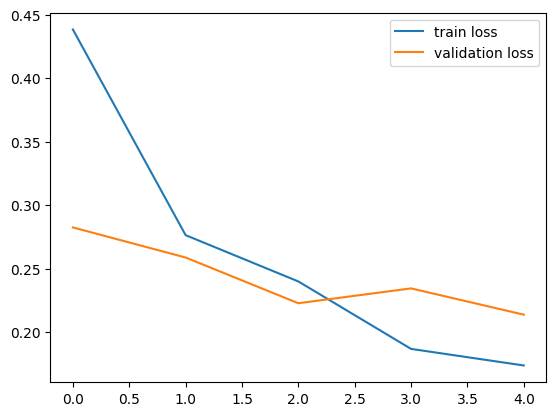

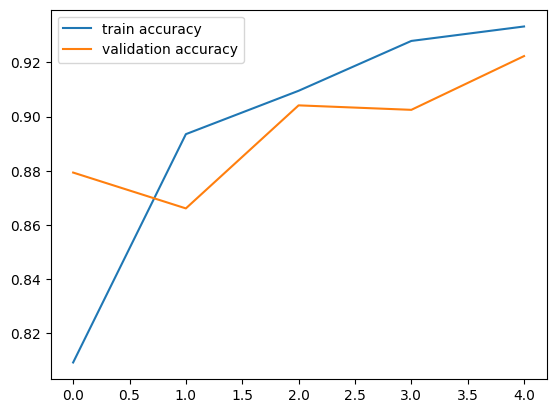

In [ ]:
h = history

#plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()


#plot the Accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

path of the image to be predicted : /content/image_prédire.jfif


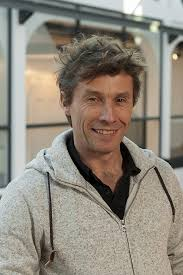

1/1 [==============================] - 0s 30ms/step
[[0.3312649  0.52920157]]
1
The person in the image is not wearing a Mask


In [ ]:
#Predictive system

input_image_path = input('path of the image to be predicted : ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image , (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])
input_prediction =  model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label )

if input_pred_label  == 0:
  print('The person in the image is wearing a Mask')

else :
  print('The person in the image is not wearing a Mask')
